# U.S. Medical Insurance Costs

In [26]:
pip install scikit-learn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  3


Min charge:  1121.8739
-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  4


Average charge:  13270.422265141257
-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  5


IQR of charges:  11899.625365
-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  6


region
northeast    324
northwest    325
southwest    325
southeast    364
dtype: int64
-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  7


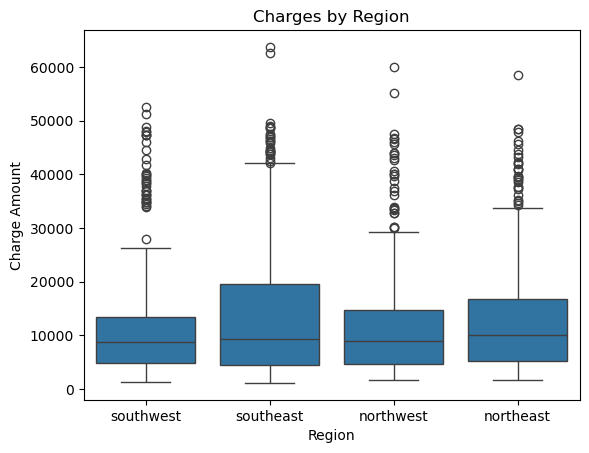

-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  8


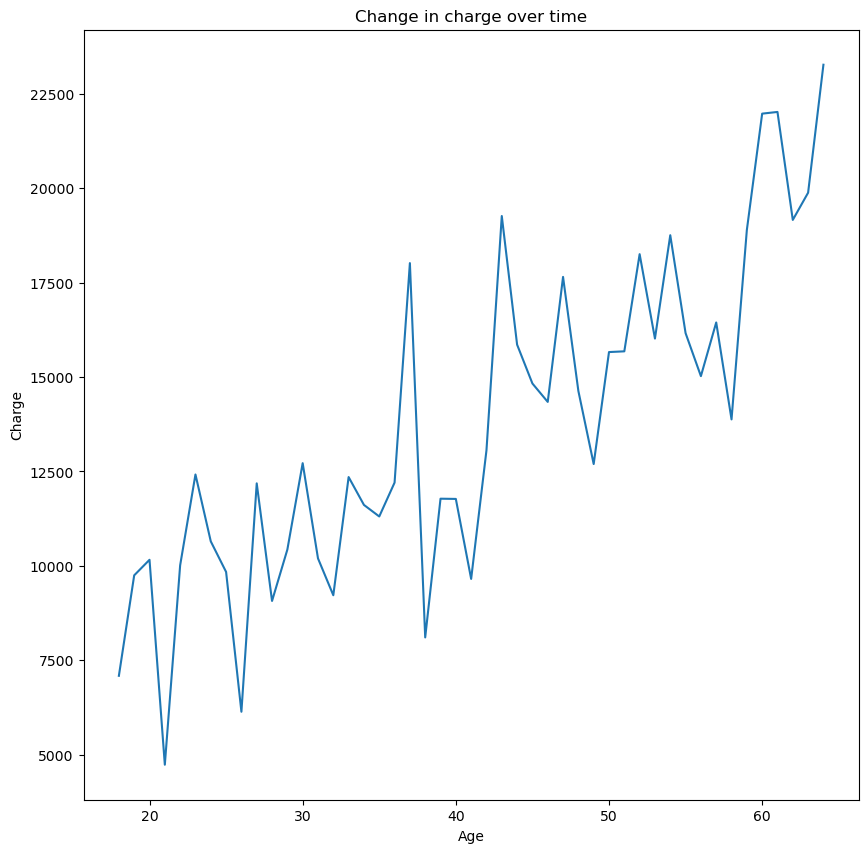

-----------------------------
What would you like to do?
1 - Encode categorical variables
2 - Get the maximum insurance charge
3 - Get the minimum insurance charge
4 - Get the average insurance charge
5 - Get the interquartile range
6 - Get the patients per region
7 - Visualise charges by region
8 - Visualise age to charge
9 - Get correlation between BMI and smoker status
10 - View impact of features on charges
11 - Get cheapest and most expensive
Press Enter to quit.


Enter a number:  9


ValueError: could not convert string to float: 'yes'

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

insurance = pd.read_csv('insurance.csv')
print(insurance.info())

# Enocde categorical variables 
def encodeCategorical(insurance):
    le = LabelEncoder()
    for col in ["sex", "smoker", "region"]:
        insurance[col] = le.fit_transform(insurance[col])
    print(insurance.head())


# Max insurance charge 
def getMaxInsuranceCharge(insurance):
    max_charge = insurance.charges.max()
    print("Max charge: ", max_charge)

# Min insurance charge
def getMinInsuranceCharge(insurance):
    min_charge = insurance.charges.min()
    print("Min charge: ", min_charge)

# Avg insurance charge
def getAvgInsuranceCharge(insurance):
    avg_charge = insurance.charges.mean()
    print("Average charge: ", avg_charge) 

# IQR range of charges 
def getIQR(insurance):
    charges_q1 = insurance.charges.quantile(0.25)    
    charges_q3 = insurance.charges.quantile(0.75)    
    charges_iqr = charges_q3 - charges_q1
    print("IQR of charges: ", charges_iqr)

# Patients per Region
def getPatientsPerRegion(insurance):
    region_counts = insurance.groupby('region').size().sort_values(ascending=True)
    print(region_counts)





""" Comparing charges inb different regions, and how charges change with age """

# Create a boxplot to show the distribution of charges for each region
def visualiseChargesByRegion(insurance):
    sns.boxplot(x='region', y='charges', data=insurance)
    plt.title('Charges by Region')
    plt.xlabel('Region')
    plt.ylabel('Charge Amount')
    plt.show()

# Line graph to show how chareg changes with age
def visualiseAgeToCharge(insurance):
    age_charge_avg = insurance.groupby('age')['charges'].mean()
    
    plt.figure(figsize=(10,10))
    plt.plot(age_charge_avg.index, age_charge_avg.values)
    plt.title('Change in charge over time')
    plt.xlabel('Age')
    plt.ylabel('Charge')
    plt.show()

# Calculating the correlation between bmi and smoke status
def viewCorrBMItoSmoker(insurance):
    correlation = insurance['bmi'].corr(insurance['smoker'])
    print(f'Correlation between BMI and Smoker: {correlation}')



""" Finding which factor impacts the charge the most, and which combination of data leads to the cheapest and which
combination leads to the most expensive charge."""

# Correlation analysis to determine which column impacts 'charges' the most
def mostImportantFactor(insurance):
    correlation_matrix = insurance.corr()
    print(correlation_matrix['charges'].sort_values(ascending=False))

    # Using Random Forest to assess feature importance
    from sklearn.ensemble import RandomForestRegressor
    
    # Define features and target variable
    X = insurance.drop('charges', axis=1)
    y = insurance['charges']
    
    # Fit Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Feature importance
    feature_importance = model.feature_importances_
    features = X.columns
    
    
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    print(importance_df)


""" Which combination leads to the cheapest and most expensive insurance charges """
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def getCheapestAndMostExpensive(insurance):
    # Define features and target variable
    X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Features
    y = insurance['charges']  # Target variable
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict charges on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model (
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    # Predict the charges for all combinations 
    predicted_charges = model.predict(X)
    
    # Add predictions to original dataframe
    insurance['predicted_charges'] = predicted_charges
    
    # Cheapest predicted charges
    cheapest_combination = insurance.loc[insurance['predicted_charges'].idxmin()]
    
    # Most expensive predicted charges
    most_expensive_combination = insurance.loc[insurance['predicted_charges'].idxmax()]
    
    print("\nCheapest Combination (Predicted):")
    print(cheapest_combination)
    
    print("\nMost Expensive Combination (Predicted):")
    print(most_expensive_combination)


while True:
    print("-----------------------------")
    print("What would you like to do?")
    print("1 - Encode categorical variables")
    print("2 - Get the maximum insurance charge")
    print("3 - Get the minimum insurance charge")
    print("4 - Get the average insurance charge")
    print("5 - Get the interquartile range")
    print("6 - Get the patients per region")
    print("7 - Visualise charges by region")
    print("8 - Visualise age to charge")
    print("9 - Get correlation between BMI and smoker status")
    print("10 - View impact of features on charges")
    print("11 - Get cheapest and most expensive")
    print("Press Enter to quit.")
    
    choice = input("Enter a number: ")
    
    if choice == "":
        print("Exiting program. Goodbye!")
        break
    elif choice == "1":
        encodeCategorical(insurance)
    elif choice == "2":
        getMaxInsuranaceCharge(insurance)
    elif choice == "3":
        getMinInsuranceCharge(insurance)
    elif choice == "4":
        getAvgInsuranceCharge(insurance)
    elif choice == "5":
        getIQR(insurance)
    elif choice == "6":
        getPatientsPerRegion(insurance)
    elif choice == "7":
        visualiseChargesByRegion(insurance)
    elif choice == "8":
        visualiseAgeToCharge(insurance)
    elif choice == "9":
        viewCorrBMItoSmoker(insurance)
    elif choice == "10":
        mostImportantFactor(insurance)
    elif choice == "11":
        getCheapestAndMostExpensive(insurance)
    else:
        print("Invalid choice. Please enter a number between 1 and 11.")

In [1]:
""" Saving features of data set by storing them in variables that can be used for analysis """
import csv 

# Initialise dictinaries 
insurance_data = {
    "age": [],
    "sex": [],
    "bmi": [],
    "children": [],
    "smoker": [],
    "region": [],
    "charges": []
}

# Read CSV file and store data in variables
with open("insurance.csv", mode="r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        insurance_data["age"].append(int(row["age"]))
        insurance_data["sex"].append(row["sex"])
        insurance_data["bmi"].append(float(row["bmi"]))
        insurance_data["children"].append(int(row["children"]))
        insurance_data["smoker"].append(row["smoker"])
        insurance_data["region"].append(row["region"])
        insurance_data["charges"].append(float(row["charges"]))

Ages: [19, 18, 28, 33, 32]
Regions: ['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
